In [1]:
import numpy as np
import mlgrad.models as models
import mlgrad.loss as loss
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
from mlgrad.utils import exclude_outliers

import mlgrad.regr as regr

import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("../data/bupa.data", sep=',')
df

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2
...,...,...,...,...,...,...,...
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,2
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1


In [22]:
from sklearn.preprocessing import scale

In [81]:
mcv = df.mcv.values
alkphos = df.alkphos.values
sgpt = df.sgpt.values
sgot = df.sgot.values
gammagt = df.gammagt.values
drinks = df.drinks.values
selector = df.selector.values

names = ["mcv", "alkphos", "sgpt", "sgot", "gammagt", "drinks"]
X = np.c_[mcv, alkphos, sgpt, sgot, gammagt, drinks]
X = np.ascontiguousarray(X, "d")
Y = selector

In [82]:
# X = scale(X)

In [83]:
print(X)

[[85. 92. 45. 27. 31.  0.]
 [85. 64. 59. 32. 23.  0.]
 [86. 54. 33. 16. 54.  0.]
 ...
 [98. 77. 55. 35. 89. 15.]
 [91. 68. 27. 26. 14. 16.]
 [98. 99. 57. 45. 65. 20.]]


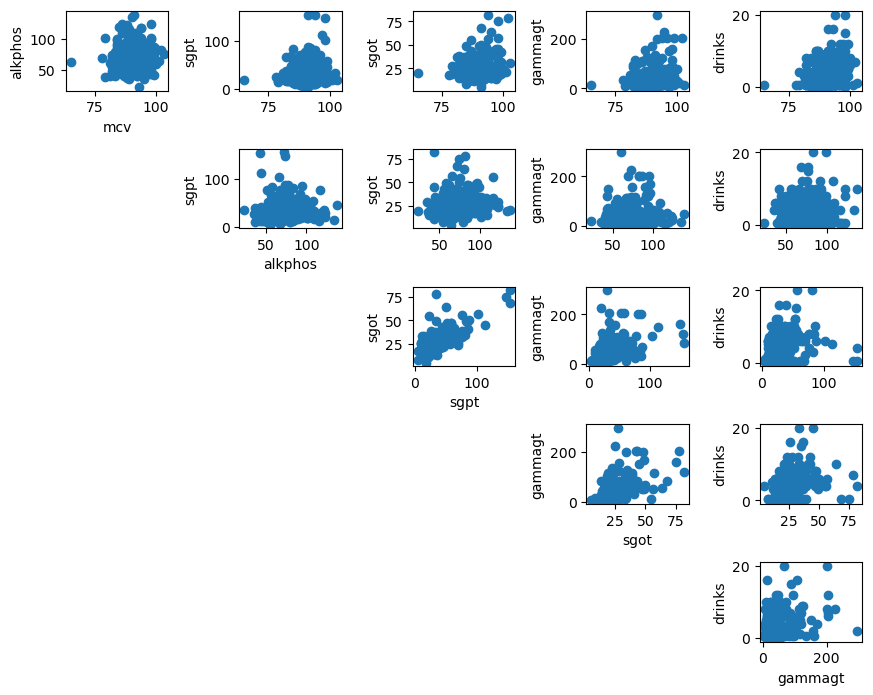

In [84]:
plt.figure(figsize=(10,8))
for i in range(6):
    for j in range(i, 6):
        if i == j: continue
        plt.subplot(6,6,6*i+j+1)
        plt.scatter(X[:,i], X[:,j])
        if j == i+1:
            plt.xlabel(names[i])
        plt.ylabel(names[j])
plt.tight_layout()
plt.show()

In [85]:
from sklearn.decomposition import PCA

In [86]:
pca = PCA()
pca.fit(X)
U = pca.transform(X)

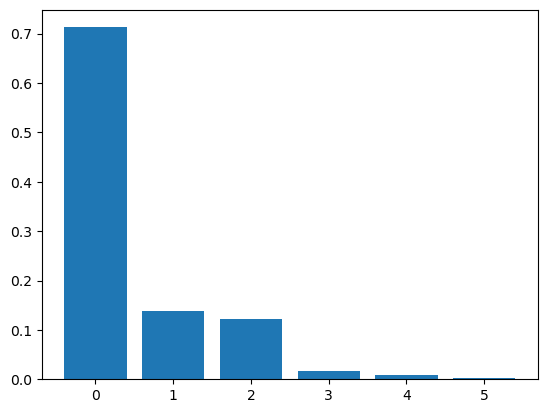

In [87]:
plt.bar(range(6), pca.explained_variance_ratio_)
plt.show()

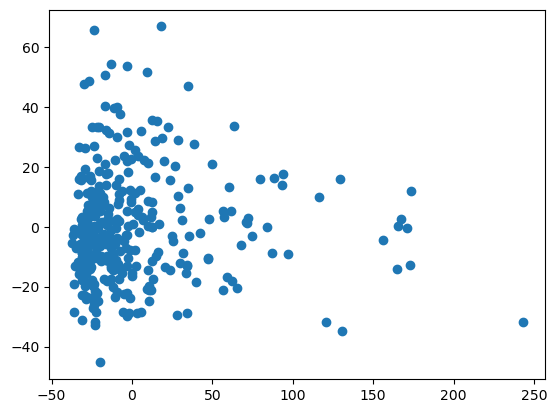

In [88]:
plt.scatter(U[:,0], U[:,1])
plt.show()

In [112]:
from mlgrad.pca import robust_location, find_robust_pc_all
from mlgrad.af import averaging_function
from mlgrad.funcs import Sqrt, Quantile_Sqrt

In [120]:
wm = averaging_function("WM", Quantile_Sqrt(0.66, 0.001))
c = robust_location(X, wm)

In [121]:
X1 = X - c

In [122]:
A, L, U = find_robust_pc_all(X1, wm, 3)
A1, A2, A3 = A
print(L)
U1, U2, U3 = U

[289.770 335.968  50.000]


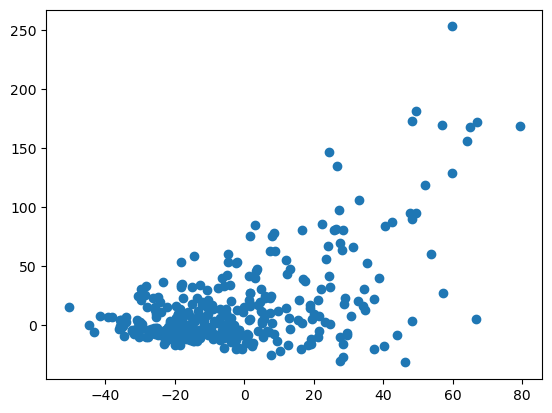

In [123]:
plt.scatter(U1, U2)
plt.show()